In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models

# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/기계학습프로그래밍/실습 파일/winequality-white.csv", sep=";").dropna()

In [10]:
# X, y 분리
X = df.drop("quality", axis=1)

In [11]:
# 라벨을 0부터 시작하는 정수로 변환
le = LabelEncoder()
y = le.fit_transform(df["quality"])

In [12]:
# 원-핫 인코딩 (딥러닝용)
y_onehot = pd.get_dummies(y).values

In [13]:
# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

In [14]:
# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# -----------------------------
# 2) 딥러닝 모델 정의
# -----------------------------
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(y_onehot.shape[1], activation="softmax")   # 클래스 개수
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [17]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4026 - loss: 1.4965 - val_accuracy: 0.5230 - val_loss: 1.1750
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5121 - loss: 1.1795 - val_accuracy: 0.5663 - val_loss: 1.1202
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5191 - loss: 1.1327 - val_accuracy: 0.5536 - val_loss: 1.1098
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5272 - loss: 1.1245 - val_accuracy: 0.5599 - val_loss: 1.0968
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5425 - loss: 1.0765 - val_accuracy: 0.5574 - val_loss: 1.0843
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5401 - loss: 1.0843 - val_accuracy: 0.5714 - val_loss: 1.0850
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5380 - loss: 1.0819 - val_accuracy: 0.5638 - val_loss: 1.0724
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5399 - loss: 1.0697 - val_accuracy: 0.

In [18]:
# -----------------------------
# 4) 평가 및 예측
# -----------------------------
y_pred = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [19]:
# one-hot → 정수 레이블로 변환
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
# Classification Report & Confusion Matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.57      0.16      0.25        25
           2       0.59      0.66      0.62       291
           3       0.56      0.65      0.60       432
           4       0.53      0.41      0.46       192
           5       0.25      0.03      0.05        35

    accuracy                           0.57       980
   macro avg       0.58      0.35      0.39       980
weighted avg       0.56      0.57      0.55       980

[[  1   0   3   1   0   0]
 [  0   4  16   4   1   0]
 [  0   2 191  90   8   0]
 [  0   1 107 280  44   0]
 [  0   0   7 104  78   3]
 [  0   0   1  18  15   1]]


In [22]:
# -----------------------------
# 5) 학습 곡선 시각화
# -----------------------------
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)


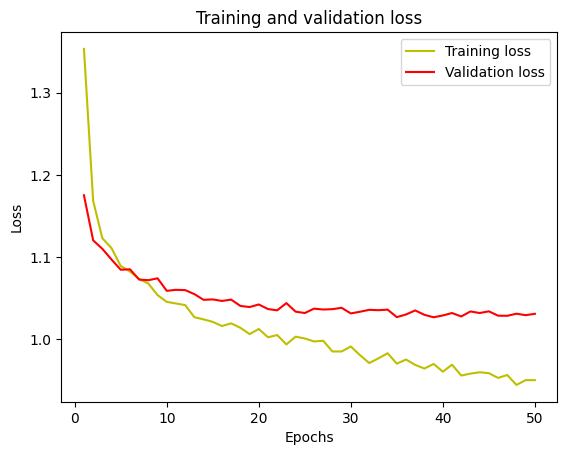

In [23]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


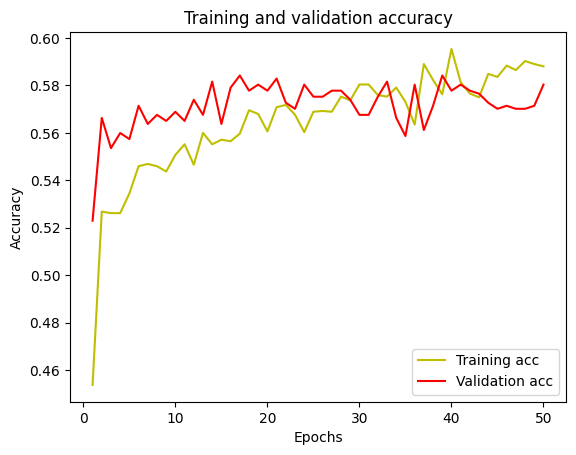

In [24]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()